# Extreme Gradient Boosting

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.8 MB/s eta 0:00:00


In [ ]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.1.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# import lightgbm as lgb
# from lightgbm import LGBMRegressor
# import sklearn
from sklearn import metrics # import f1_score, confusion_matrix, accuracy_score, mean_squared_error
# from sklearn.ensemble import GradientBoostingRegressor#, RandomForestRegressor,
                              #StackingRegressor)
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
# import pickle
import joblib

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train R^2: {:.2f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('\n')
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test R^2: {:.2f}'.format(metrics.r2_score(y_test, y_test_predict)))

def print_test(y_test, y_test_pred):
  y_t = []
  y_t_p = []
  cnt = 0
  for i in range(len(y_test)):
    if cnt < len(y_test):
      y_t.append(y_test[cnt])
      y_t_p.append(y_test_pred[cnt])
      cnt += 1000
    else:
      break
  return(y_t, y_t_p)

In [ ]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_train_scaled.zip')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_test_scaled.zip')
y_train = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_test.csv')
y_train = y_train['target'].tolist()
y_test = y_test['target'].tolist()
y_train_log = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train_log.csv')
y_train_log = y_train_log['target'].tolist()

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(len(y_train))
print(len(y_test))

(280575, 25)
(70144, 25)
280575
70144


In [ ]:
random_state = 42

In [ ]:
# Гип. параметры по умолчанию
xgboost = XGBRegressor()
hiperparams = xgboost.get_params()

print("Гиперпараметры по умолчанию:")
for key, value in hiperparams.items():
    print(f"\t{key}: {value}")

Гиперпараметры по умолчанию:
	objective: reg:squarederror
	base_score: None
	booster: None
	callbacks: None
	colsample_bylevel: None
	colsample_bynode: None
	colsample_bytree: None
	early_stopping_rounds: None
	enable_categorical: False
	eval_metric: None
	feature_types: None
	gamma: None
	gpu_id: None
	grow_policy: None
	importance_type: None
	interaction_constraints: None
	learning_rate: None
	max_bin: None
	max_cat_threshold: None
	max_cat_to_onehot: None
	max_delta_step: None
	max_depth: None
	max_leaves: None
	min_child_weight: None
	missing: nan
	monotone_constraints: None
	n_estimators: 100
	n_jobs: None
	num_parallel_tree: None
	predictor: None
	random_state: None
	reg_alpha: None
	reg_lambda: None
	sampling_method: None
	scale_pos_weight: None
	subsample: None
	tree_method: None
	validate_parameters: None
	verbosity: None


In [ ]:
def XGBoost(trial): # , data=x, target=y
    # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2, random_state=1)
    param = {
        
        'max_depth': trial.suggest_int('max_depth', 1, 8),
        # 'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': 1000,
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        # 'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'colsample_bytree': 0.8,
        # 'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'eta': trial.suggest_float('eta', 0.05, 0.5),
        # 'random_state': trial.suggest_int('random_state', 1, 1000),
        'random_state': 42
    }
    
    # Инициализируем XGBRegressor объект.
    xgboost = XGBRegressor(**param,
                           objective='reg:squarederror'
                        # n_estimators=1000,
                        # max_depth=7,
                        # eta=0.1,
                        # subsample=0.7,
                        # colsample_bytree=0.8
    )


    xgboost.fit(X_train_scaled, y_train_log)
    y_test_pred = np.exp(xgboost.predict(X_test_scaled))
    # preds = xgboost.predict(X_test_scaled)
    # rmse = metrics.mean_squared_error(y_test, preds,squared=False)
    # return rmse
    score = metrics.r2_score(y_test, y_test_pred)

    return score

https://practicaldatascience.co.uk/machine-learning/how-to-tune-an-xgbregressor-model-with-optuna

In [ ]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(XGBoost, n_trials=10)
print('=======================================================')
print('No of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-03-14 13:40:55,671] A new study created in memory with name: no-name-d6d054a9-c986-4f9a-9a55-0fbc24afa6d3
[I 2023-03-14 13:45:24,112] Trial 0 finished with value: 0.8201033705185834 and parameters: {'max_depth': 6, 'subsample': 0.7911249475014084, 'eta': 0.19705325333650053}. Best is trial 0 with value: 0.8201033705185834.
[I 2023-03-14 13:46:22,780] Trial 1 finished with value: 0.7027956107832958 and parameters: {'max_depth': 1, 'subsample': 0.5158690386661392, 'eta': 0.32970995614659804}. Best is trial 0 with value: 0.8201033705185834.
[I 2023-03-14 13:51:01,004] Trial 2 finished with value: 0.7929242415377711 and parameters: {'max_depth': 6, 'subsample': 0.5308210944883336, 'eta': 0.31875710362141474}. Best is trial 0 with value: 0.8201033705185834.
[I 2023-03-14 13:56:48,835] Trial 3 finished with value: 0.8049826895910711 and parameters: {'max_depth': 8, 'subsample': 0.8506907173750622, 'eta': 0.29004162250993637}. Best is trial 0 with value: 0.8201033705185834.
[I 2023-03

No of finished trials: 10
Best trial: {'max_depth': 5, 'subsample': 0.85110144699924, 'eta': 0.12089000475184267}
CPU times: user 48min 50s, sys: 4.98 s, total: 48min 55s
Wall time: 27min 2s


In [ ]:
# рассчитаем точность для обучающей и тестовой выборок.
xgboost = XGBRegressor(**study.best_params,
                       objective='reg:squarederror',
                        # n_estimators=1000,
                        # max_depth=7,
                        # eta=0.1,
                        # subsample=0.7,
                        # colsample_bytree=0.8, 
                        random_state=random_state
                       )
xgboost.fit(X_train_scaled, y_train_log)

# # Производим сериализацию и записываем обученную модель в файл формата pkl
# with open('xgb.pkl', 'wb') as output:
#     pickle.dump(xgboost, output)

# Производим сериализацию и сохраняем результат в файл формата .joblib
joblib.dump(xgboost, '/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/fit_models/xgboost.joblib')

y_train_pred_xgb = np.exp(xgboost.predict(X_train_scaled))
y_test_pred_xgb = np.exp(xgboost.predict(X_test_scaled))

# Сохраним предсказание в файл.
np.savetxt("/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_xgb.csv", y_test_pred_xgb, delimiter=",")

print_metrics(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)
# Train R^2: 0.88
# Test R^2: 0.84

Train MAE: 95063.91
Train MAPE: 22.63%
Train R^2: 0.80


Test MAE: 98061.31
Test MAPE: 23.74%
Test R^2: 0.79


In [ ]:
y_test_pred_xgb

array([283117.56,  88373.98, 396927.16, ..., 148008.  , 253562.12,
       248479.28], dtype=float32)

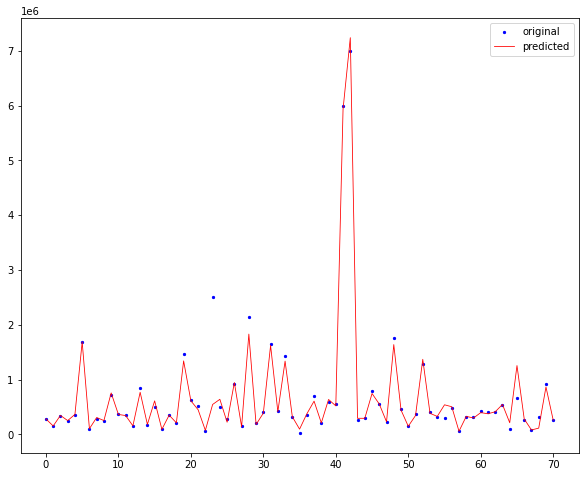

In [ ]:
# Возмём каждую 1000-ю строку из выборок, чтобы визуально убедиться в точности предсказаний.
y_t, y_t_p = print_test(y_test, y_test_pred_xgb)

# Визуализируем предсказания на тестовой выборке.
x_ax = range(len(y_t))
plt.figure(figsize=(10,8))
# Точки тестовой выборки.
plt.scatter(x_ax, y_t, s=5, color="blue", label="original")
# График предсказаний.
plt.plot(x_ax, y_t_p, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

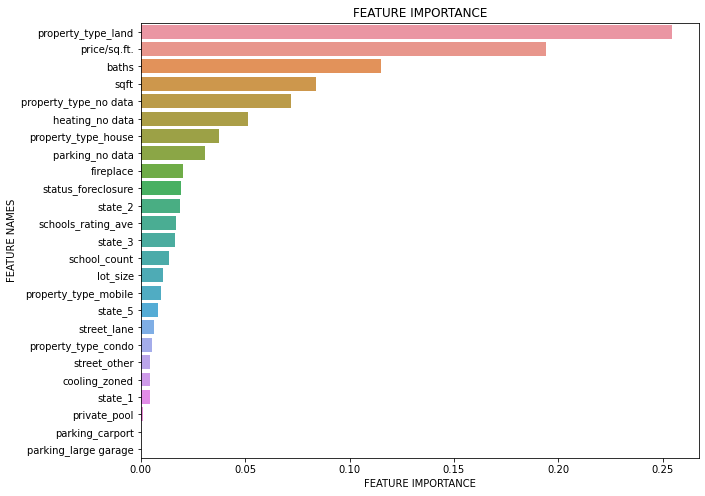

In [ ]:
# Покажем важность признаков.
feature_importance = np.array(xgboost.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

# Создадим DataFrame, используя словарь.
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Определим размер столбчатой диаграммы.
plt.figure(figsize=(10,8))
# Построим столбчатую диаграмму.
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Добавим метки диаграммы.
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

In [ ]:
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred_xgb)
mape_xgb = metrics.mean_absolute_percentage_error(y_test, y_test_pred_xgb)*100
r2_xgb = metrics.r2_score(y_test, y_test_pred_xgb)

print(round(mae_xgb, 2))
print(round(mape_xgb, 2))
print(round(r2_xgb, 2))

98061.31
23.74
0.79


In [ ]:
optuna.visualization.plot_optimization_history(study, target_name="r2_score")

In [ ]:
optuna.visualization.plot_param_importances(study, target_name="r2_score")